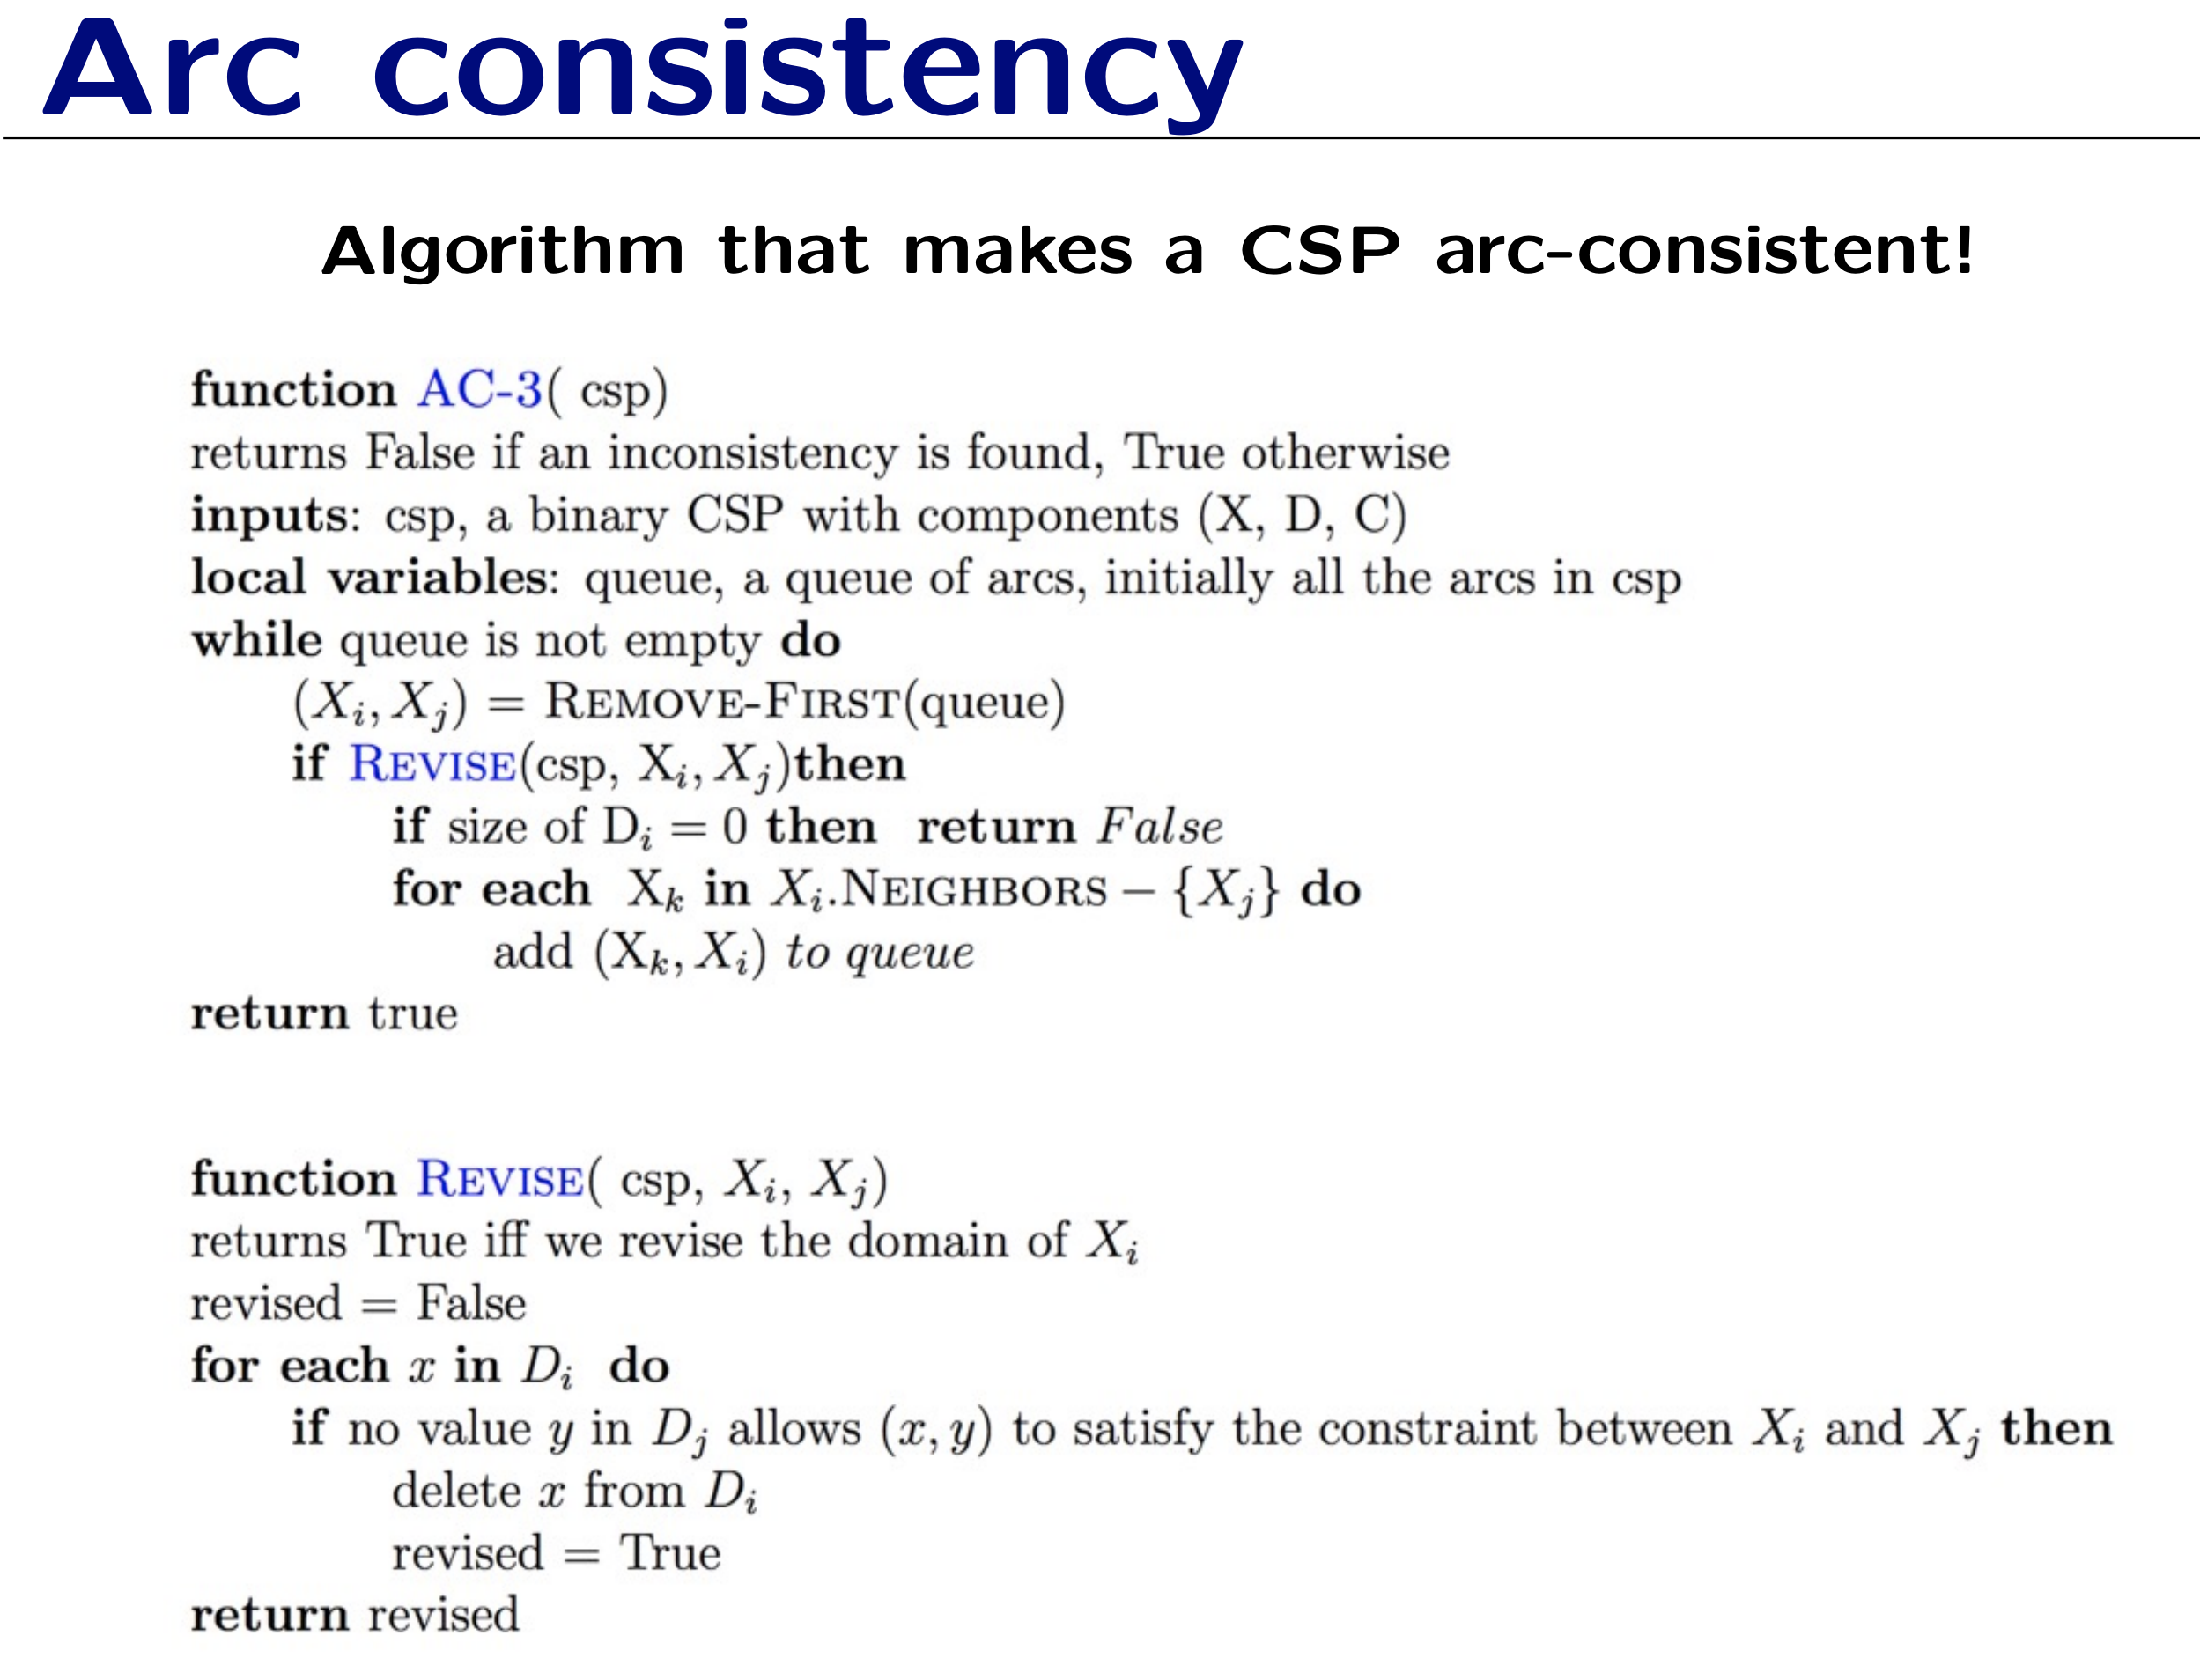

In [1]:
from itertools import product
from queue import deque
from functools import lru_cache
import copy
from time import process_time


In [ ]:
squares = list(product(range(9),range(9)))
def Neighbours(squares):
    neighbours = dict()
    for x,y in squares:
        neighbours[x,y] = set([(i,y) for i in range(9) if i!=x] + [(x,j) for j in range(9) if j!=y] + [(x//3*3+i,
                                y//3*3+j) for i in range(3) for j in range(3) if (x//3*3+i!=x and y//3*3+j!=y)])
        
    return neighbours
Neighbours = Neighbours(squares)

agenda = deque()
for x in Neighbours.keys():
    for y in Neighbours[x]:
#         if x!=y:
        agenda.append((x,y))
agenda = deque((sorted(agenda)))

domain = {}
for idx,square in enumerate(squares):
    if int(o[idx])==0:
        domain[square]=list(range(1,10))
    else:
        domain[square]= [int(o[idx])]
        
while agenda:
    x,y = agenda.popleft()
    for m in domain[x]:
        if not any(m!=t for t in domain[y]):
            domain[x].remove(m)
            for r in Neighbours[x]:
                agenda.append((r,x))

    
    

In [2]:
class Suduko(object):
    def __init__(self,data):
        
        # A set of variables, X = {X1, X2, ··· Xn}
        self.variables = list(product(range(9),range(9)))
        self.domains = {}
        self.neighbours = {}
        self.arcs = {}
        
        # Define the set of domains for each variable: D = {D1, D2, ··· Dn}
        for idx,Xi in enumerate(self.variables):
            self.domains[Xi] = list(range(1,10)) if int(data[idx]) == 0 else [int(data[idx])]
        
        # Neighbouring cells
        for x,y in self.variables:
            self.neighbours[x,y] = ([(i,y) for i in range(9) if i!=x] + 
                    [(x,j) for j in range(9) if j!=y] + 
                    [(x//3*3+i,y//3*3+j) for i in range(3) for j in range(3) if (x//3*3+i!=x and y//3*3+j!=y)])
        
        # Define the Arcs: pairs of cells and their neighbours that will be used to start the queue
        for Xi in self.neighbours:
            self.arcs[Xi] = [(Xi,Xj) for Xj in self.neighbours[Xi]]
        
#         # Unassigned cells
#         self.unassigned = {}
#         for Xi in self.domains:
#             self.unassigned[Xi] = len(self.domains[Xi])>1
            
        return
        
    def isSolved(self):
        if all(len(d)==1 for d in self.domains.values()):
            return True
        return False
    
#     def cloneDomains(self):
#         clone = {}
#         for key in self.domains:
#             kValues = []
#             for v in self.domains[key]:
#                 kValues.append(v)
#             clone[key] = kValues
#         return clone
    def cloneDomains(self):
        clone = copy.deepcopy(self.domains)
        return clone
    
    def getNeighbours(self,Xi):
        return self.neighbours[Xi]
    
    def printPuzzle(self):
        x_keys = y_keys = list(range(9))
        result = "  0 1 2 3 4 5 6 7 8 \n"
        result += " +-----+-----+-----+\n"
        for y in range(9):
            result += str(y_keys[y]) + "|"
            for x in range(9):
                domain = self.domains[y_keys[y] , x_keys[x]]
                if (len(domain) == 1):
                    val = domain[0]
                else:
                    val = 0
                result += str(val)
                if (x == 2 or x == 5 or x == 8):
                    result += "|"
                else:
                    result += " "
            if (y == 2 or y == 5 or y == 8):
                result += "\n +-----+-----+-----+\n"
            else:
                result += "\n"
        return print(result)
       
    def getAgenda(self):
        result = set()
        for x in self.neighbours.keys():
            for y in self.neighbours[x]:
                result.add((x,y))
        return sorted(result)
    
class AC3(object):
    # X=variables
    # D=domain
    # C=constraints
    def __init__(self, csp):
        self.csp = csp
        return

    #A set of constraints C that specify allowable combinations of values
    def revise(self, Xi, Xj):
        revised = False
        for x in self.csp.domains[Xi]:
            if not any(x!=t for t in self.csp.domains[Xj]):
                self.csp.domains[Xi].remove(x)
                revised = True
        return revised
  
    # returns false if an inconsistency is found, otherwise true
    def solve(self):
        # queue - a queue of arcs, initially all the CSP arcs
        agenda = deque(self.csp.getAgenda())
        while agenda:
            (Xi, Xj) = agenda.popleft()
            if (self.revise(Xi, Xj)):
                if (len(self.csp.domains[Xi]) == 0):
                    return False
                for Xk in self.csp.neighbours[Xi]:
                    agenda.append((Xk, Xi))
        return True

In [3]:
class BTS(object):
    def __init__(self,csp):
        self.csp = csp
        self.unassigned = {}
        for Xi in self.csp.domains:
            self.unassigned[Xi] = len(self.csp.domains[Xi])>1
        return
    
#     def getNext(self):
#         nextKey,nextValues = sorted(
#             filter(
#                 lambda values: len(values[1]) > 1, self.csp.domains.items()),key=lambda x:len(x[1]
#                                                                                              )
#         )[0]
#         return nextKey,nextValues

    def getUnassigned(self):
        minKey = None
        minValues = None
        
        for key in self.unassigned.keys():
            if self.unassigned[key] == True:
                values = self.csp.domains[key]
                if minValues == None or len(values) < len(minValues):
                    minKey = key
                    minValues = values
        return (minKey, minValues)

   # return true when for every value x of X, there is some allowed y
    def isConsistent(self, key, value):
        for Xn in self.csp.neighbours[key]:
            values = self.csp.domains[Xn]
            if (len(values) == 1 and values[0] == value):
                return False
        return True
 
    def search(self, depth):
#         global savedValues
        # check if the terminal state is true
        if (self.csp.isSolved()):return True
        # Pick the next unassigned cell witht he least number of values
        (key, values) = self.getUnassigned()

        # for each value in order-domain-values(csp, assigment, csp)
        for value in values:
            if (self.isConsistent(key, value)):
#                 print(key,value)
                savedValues = self.csp.cloneDomains()
                self.csp.domains[key] = [value]
                self.unassigned[key] = False
                ac3 = AC3(self.csp)
                ac3.solve()
                if self.search(depth + 1): 
                    return True
                # Backtrack if search didn't solve
                self.unassigned[key] = True
                self.csp.domains = savedValues
        
        return False
    def solve(self):
        start_time = process_time()
        
        return self.search(1),process_time()-start_time

In [4]:
csp = Suduko('003020600900305001001806400008102900700000008006708200002609500800203009005010300')
ac3 = AC3(csp)
bts = BTS(csp)

In [5]:
bts.solve()

(True, 0.02024500000000007)

In [6]:
print(csp.isSolved())
csp.printPuzzle()

True
  0 1 2 3 4 5 6 7 8 
 +-----+-----+-----+
0|4 8 3|9 2 1|6 5 7|
1|9 6 7|3 4 5|8 2 1|
2|2 5 1|8 7 6|4 9 3|
 +-----+-----+-----+
3|5 4 8|1 3 2|9 7 6|
4|7 2 9|5 6 4|1 3 8|
5|1 3 6|7 9 8|2 4 5|
 +-----+-----+-----+
6|3 7 2|6 8 9|5 1 4|
7|8 1 4|2 5 3|7 6 9|
8|6 9 5|4 1 7|3 8 2|
 +-----+-----+-----+



In [ ]:
### side notes
data = '000005000020004010030080020000008400800600000090010705006000000950003060003000001'
domains = {}
variables = list(product(range(9),range(9)))
for idx,v in enumerate(variables):
    domains[v] = list(range(1,10)) if int(data[idx]) == 0 else [int(data[idx])]

neighbours = {}
for x,y in variables:
    neighbours[x,y] = ([(i,y) for i in range(9) if i!=x] + 
                    [(x,j) for j in range(9) if j!=y] + 
                   [(x//3*3+i,y//3*3+j) for i in range(3) for j in range(3) if (x//3*3+i!=x and y//3*3+j!=y)])

arcs = {}
for v in neighbours:
    arcs[v] = [(v,n) for n in neighbours[v]]

unassigned = {}
for xi in domains:
    unassigned[xi] = len(domains[xi])>1

for Xi in unassigned:
    if unassigned[Xi]==True:
        

In [ ]:
# In this assignment you will focus on constraint satisfaction
# problems. You will be implementing the AC-3 and backtracking
# algorithms to solve Sudoku puzzles. The objective of the game is just
# to fill a 9 x 9 grid with numerical digits so that each column, each
# row, and each of the nine 3 x 3 sub-grids (also called boxes) contains
# one of all of the digits 1 through 9. If you have not played the game
# before, you may do so at sudoku.com to get a sense of how the game
# works.
#
# There are 81 variables in total, i.e. the tiles to be filled with
# digits. Each variable is named by its row and its column, and must be
# assigned a value from 1 to 9, subject to the constraint that no two
# cells in the same row, column, or box may contain the same value.
#
# In designing your classes, you may find it helpful to represent a
# Sudoku board with a Python dictionary. The keys of the dictionary will
# be the variable names, each of which corresponds directly to a
# location on the board. In other words, we use the variable names Al
# through A9 for the top row (left to right), down to I1 through I9 for
# the bottom row. For example, in the example board above, we would have
# sudoku["B1"] = 9, and sudoku["E9"] = 8. This is the highly suggested
# representation, since it is easiest to frame the problem in terms of
# variables, domains, and constraints if you start this way. In this
# assignment, we will use the number zero to indicate tiles that have
# not yet been filled.
#
# By now, we expect that you have a good sense of appropriate data
# structures and object representations. Naive brute-force approaches to
# solving Sudoku puzzles may take minutes, or even hours, to [possibly
# never] terminate. However, a correctly implemented backtracking
# approach as specified above should take well under a minute per
# puzzle. The grader will provide some breathing room, but programs with
# much longer running times will be killed.
import sys
import copy

x_keys = ['1','2','3','4','5','6','7','8','9']
y_keys = ['a','b','c','d','e','f','g','h','i']

class Queue:
   # A container with a first-in-first-out (FIFO) queuing policy.
   # https://docs.python.org/2/tutorial/datastructures.html
   def __init__(self, initial):
      self.items = initial

   def contains(self, item):
      return item in self.items

   def empty(self):
      return len(self.items) == 0

   def push(self, item):
      self.items.insert(0,item)

   def pop(self):
      return self.items.pop()

   def size(self):
      return len(self.items)

# The CSP to be solved
class Sudoku:
   def __init__(self, s):
      if type(s) is str:
         self.values = {}
         index = 0
         for y in range(0, 9):
            for x in range(0, 9):
               n = s[index]
               if (n == "0"):
                  val = [1,2,3,4,5,6,7,8,9]
               else:
                  val = [int(n)]
               self.values[y_keys[y] + x_keys[x]] = val
               index += 1
      else:
         self.values = s
      self.arcs = {}
      for y in range(0, 9):
         for x in range(0, 9):
            key = y_keys[y] + x_keys[x]
            self.arcs[key] = self.getNeighborArcs(x, y)

   def cloneValues(self):
      values = {}
      for key in self.values.keys():
         newValues = []
         for nextValue in self.values[key]:
            newValues.append(nextValue)
         values[key] = newValues
      return values

   def isSolved(self):
      result = True
      for d in self.values.values():
         if (len(d) > 1):
            result = False
            break
      return result

   def toString(self):
      result = "  1 2 3 4 5 6 7 8 9 \n"
      result += " +-----+-----+-----+\n"
      for y in range(0, 9):
         result += y_keys[y] + "|"
         for x in range(0, 9):
            domain = self.values[y_keys[y] + x_keys[x]]
            if (len(domain) == 1):
               val = domain[0]
            else:
               val = 0

            result += str(val)
            if (x == 2 or x == 5 or x == 8):
               result += "|"
            else:
               result += " "
         if (y == 2 or y == 5 or y == 8):
            result += "\n +-----+-----+-----+\n"
         else:
            result += "\n"
      return result

   def getNeighborArcs(self, i, j):
      arcs = {}
      cell = y_keys[j] + x_keys[i]
      xoffs = (i // 3) * 3
      yoffs = (j // 3) * 3

      for x in range(0, 9):
         if (x != i):
            arcs[(cell, y_keys[j] + x_keys[x])] = 1
      for y in range(0, 9):
         if (y != j):
            arcs[(cell, y_keys[y] + x_keys[i])] = 1
      for x in range(xoffs, xoffs + 3):
         for y in range(yoffs, yoffs + 3):
            if (x != i or y != j):
               arcs[(cell, y_keys[y] + x_keys[x])] = 1
      return arcs.keys()

   def getArcs(self):
      result = []
      for y in range(0, 9):
         for x in range(0, 9):
            result += self.getNeighborArcs(x, y)
      return result

   def getNeighbors(self, Xi):
      result = []
      for (x,y) in self.arcs[Xi]:
         result.append(y)
      return result

   def writeOutput(self):
      result = ""
      for y in range(0, 9):
         for x in range(0, 9):
            val = self.values[y_keys[y] + x_keys[x]]
            if (len(val) == 0):
               result += "0"
            else:
               result += str(val[0])
      result += "\n"
      with open("output.txt", "a") as out:
         out.write(result)
      return

def usage():
   print("python driver.py <input_string>")
   sys.exit(2)

# III. AC-3 Algorithm
#
# First, implement the AC-3 algorithm. Test your code on the provided
# set of puzzles in sudokus_start.txt. To make things easier, you can
# write a separate wrapper script (bash, or python) to loop through all
# the puzzles to see if your program can solve them. How many of the
# puzzles you can solve? Is this expected or unexpected?
class AC3:
   # X=variables
   # D=domain
   # C=constraints
   def __init__(self, csp):
      self.csp = csp
      return

   # To check arc-consistency we need to check that for all values in Xi,
   # there is a permissible or allowed value in Xj.
   # Return True if we revise the domain of Xi
   #
   # eg: NSW (red,blue) -> SA (blue)
   #  when checking NSW+blue, there is no value in SA allowing blue
   #
   # Given the current domains of SA and NSW,
   # the arc is consistent if, for every value x of SA, there is some
   # value y of NSW that is consistent with x
   def revise(self, Xi, Xj):
      Di = self.csp.values[Xi]
      result = False
      index = 0
      for x in Di:
         invalid = True
         for y in self.csp.values[Xj]:
            if x != y:
               # has some value that is consistent with x
               invalid = False
         if invalid:
            Di.pop(index)
            result = True
         else:
            index += 1

      return result

   # returns false if an inconsistency is found, otherwise true
   def solve(self):
      # queue - a queue of arcs, initially all the CSP arcs
      queue = Queue(self.csp.getArcs())
      while not queue.empty():
         (Xi, Xj) = queue.pop()
         if (self.revise(Xi, Xj)):
            if (len(self.csp.values[Xi]) == 0):
               return False
            for Xk in self.csp.getNeighbors(Xi):
               queue.push((Xk, Xi))
      return True

# IV. Backtracking Algorithm
#
# Now, implement backtracking using the minimum remaining value
# heuristic. The order of values to be attempted for each variable is up
# to you. When a variable is assigned, apply forward checking to reduce
# variables domains. Test your code on the provided set of puzzles in
# sudokus_start.txt. Can you solve all puzzles now?
class BTS():
   def __init__(self, csp):
      self.csp = csp
      self.unassigned = {}
      self.useAC3 = True

      for key in self.csp.values.keys():
         values = self.csp.values[key]
         self.unassigned[key] = (len(values) != 1)

      return

   def getUnassigned(self):
      minKey = None
      minValues = None

      for key in self.unassigned.keys():
         if self.unassigned[key] == True:
            values = self.csp.values[key]
            if minValues == None or len(values) < len(minValues):
               minKey = key
               minValues = values

      return (minKey, minValues)

   # return true when for every value x of X, there is some allowed y
   def isConsistent(self, key, value):
      result = True
      for Xk in self.csp.getNeighbors(key):
         values = self.csp.values[Xk]
         if (len(values) == 1 and values[0] == value):
            result = False

      return result

   def search(self, depth):
      if (self.csp.isSolved()):
         return True

      # var = select-unassigned-variables(csp)
      (key, values) = self.getUnassigned()

      # for each value in order-domain-values(csp, assigment, csp)
      for value in values:
         # if value is consistent with assignment then
         if (self.isConsistent(key, value)):
            print(key,value)
            savedValues = self.csp.cloneValues()
            self.csp.values[key] = [value]
            self.unassigned[key] = False
            ac3 = AC3(self.csp)
            ac3.solve()

            if self.search(depth + 1):
               return True

            # revert the changes
            print('backtracking')
            self.unassigned[key] = True
            self.csp.values = savedValues
            print(depth,key,self.csp.values[key],self.csp.values['d4'])

      return False

   def solve(self):
      return self.search(1)

In [ ]:
csp = Sudoku('000005000020004010030080020000008400800600000090010705006000000950003060003000001')
bts = BTS(csp)
ac3 = AC3(csp)

In [ ]:
bts.solve()